In [2]:
#Multi class clasifaction problem

# Import 
import torch
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import numpy as np

In [5]:

!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [6]:
import yfinance as yf
from datetime import datetime
today = datetime.today().strftime('%Y-%m-%d')
start_date = '2016-01-01'
eth = yf.download('ETH-USD',start_date, today)
eth.tail()



[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-23,1135.421509,1184.997314,1130.022827,1183.199585,1183.199585,11242676044
2022-11-24,1183.345093,1211.627441,1180.379761,1203.983154,1203.983154,9706372376
2022-11-25,1203.799438,1203.799438,1174.823364,1198.925903,1198.925903,5483308196
2022-11-26,1198.790527,1227.038086,1198.097900,1205.897949,1205.897949,5074160558
2022-11-27,1205.905273,1220.349487,1195.039062,1195.126953,1195.126953,4486976868


Date
2017-11-09    22.395996
2017-11-10    30.175995
2017-11-11    21.261017
2017-11-12    20.640015
2017-11-13    21.390015
                ...    
2022-11-23    54.974487
2022-11-24    31.247681
2022-11-25    28.976074
2022-11-26    28.940186
2022-11-27    25.310425
Length: 1845, dtype: float64 <built-in method size of Tensor object at 0x7f2687a24530>


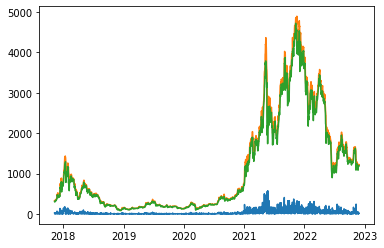

In [7]:
from numpy.linalg import tensorinv
#print(eth)
eth.columns

#plt.axes([-100,100,2015,2022])
VOLUME=torch.tensor(eth["Volume"]).reshape((1845,1))/11242676044
plt.plot(eth["High"]-eth["Open"])
MAX_MIN=torch.tensor(eth["Open"]-eth["Close"])
plt.plot(eth["High"])
plt.plot(eth["Low"])
LOW=torch.tensor(eth["Low"]).reshape((1845,1)).float()
CLOSED=torch.tensor(eth["Close"])
OPEN=torch.tensor(eth["Open"]).reshape((1845,1)).float()
print(eth["High"]-eth["Low"],VOLUME.size)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  ../aten/src/ATen/native/Copy.cpp:250.)
  


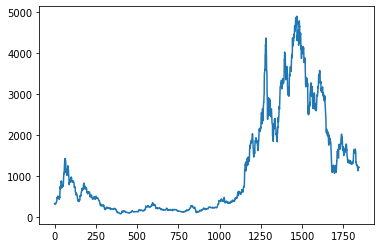

In [9]:
from scipy.fft import fft, ifft,fftfreq
yf=fft(np.array(eth["High"]))
#print(X)
X=ifft(yf)
xf=fftfreq(1845,1)
#plt.plot(xf,yf)
plt.plot(X)
INPUT=torch.tensor([yf]).float()


In [10]:
from torch import nn


model=nn.Sequential(
    
    nn.Conv1d(1,1845,50,20),
    nn.Linear(in_features=90,out_features=90,bias=True),
    nn.ReLU(),
    nn.ReLU(),
    nn.ReLU(),
    #nn.ReLU(),
    #nn.ReLU(),
    #nn.ReLU(),
    #nn.Softmax(),
    #nn.Softmax(),
    #nn.Softmax(),
    #nn.Softmax(),
    nn.Linear(in_features=90,out_features=1,bias=True)

              )


In [11]:

CLOSED=CLOSED.reshape((1845,1)).float()
#loss=nn.L1Loss()
loss=nn.MSELoss()
optimaizer=torch.optim.Adam(model.parameters(),lr=0.01)
#MAX_MIN=MAX_MIN.reshape((1845,1)).float()
#TRAINING=torch.cat((OPEN,MAX_MIN*0),0).reshape((1845,2))
gubitci=[]
for epoch in range(1000):
  PRED=model(INPUT)
  #LOSS=loss(CLOSED,PRED)
  LOSS=loss(PRED,CLOSED)
  gubitci.append(LOSS.item())
  model.zero_grad()
  LOSS.backward()
  optimaizer.step()






[[102.86056 -0.j]
 [251.0202  -0.j]
 [ 22.949913-0.j]
 ...
 [963.28235 -0.j]
 [637.55646 -0.j]
 [626.80585 -0.j]]


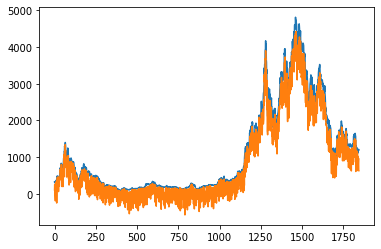

In [12]:
#plt.plot(gubitci)
plt.plot(CLOSED)
a=PRED.detach().numpy()
POM=ifft(PRED.detach().numpy())
#POM=ifft(np.sqrt((a.real*a.real+a.imag*a.imag)))
print(POM)
pom=[]
for i in range(0,1845):
  pom.append(i)
t=np.array(pom)
plt.plot(PRED.detach().numpy())


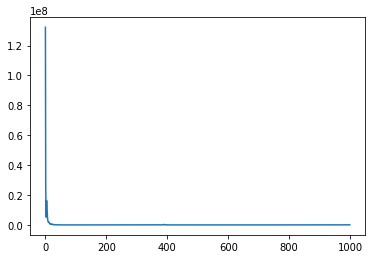

In [13]:
plt.plot(gubitci)



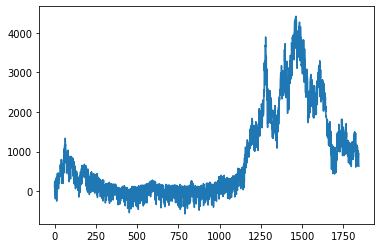

In [46]:
plt.plot(PRED.detach().numpy())

[1859.9525]
[1797.9838]
[1805.9036]
[1804.9137]
[1804.9775]
[1805.0233]
[1804.9669]
[1804.9603]
[1804.9423]
[1804.9774]
[1805.0126]
[1805.0217]
[1805.0317]
[1804.9156]
[1804.9352]
[1804.973]
[1805.0021]
[1804.9338]
[1804.9733]
[1805.0206]
[1805.0242]
[1804.9637]
[1805.0393]
[1805.0125]
[1804.9792]
[1804.994]
[1804.9807]
[1805.0193]
[1804.9958]
[1804.9277]
[1860.8983154296875, 1798.136962890625, 1805.9869384765625, 1805.4864501953125, 1805.1036376953125, 1805.5616455078125, 1805.6116943359375, 1805.7611083984375, 1805.478271484375, 1805.204345703125, 1805.126220703125, 1805.0408935546875, 1805.9686279296875, 1805.809326171875, 1805.50634765625, 1805.2802734375, 1805.818603515625, 1805.5064697265625, 1805.1356201171875, 1805.1124267578125, 1805.583251953125, 1804.9837646484375, 1805.2020263671875, 1805.469482421875, 1805.347900390625, 1805.4466552734375, 1805.14599609375, 1805.3316650390625, 1805.868896484375, 1805.354248046875]


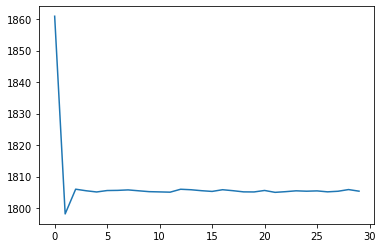

In [84]:
lista=np.array(eth["High"])
n_element=1844
lista[n_element]=1342.0
crtanje=[]
for i in range(30):
  pom=fft(np.array(lista))
  mod=model(torch.tensor([pom]).float())#reshape((1,1845)).float())
  lista[n_element]=mod.detach().numpy()[1844]+np.random.rand()
  print(mod.detach().numpy()[1844])
  crtanje.append(lista[n_element])
#print(ifft(mod.detach().numpy()))
print(crtanje)

plt.plot(crtanje)